# Baseball

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [11]:
import matplotlib.pyplot as plt

In [12]:
data=pd.read_csv(r'D:\Data Science\baseball.csv')
data.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424


In [13]:
len(data.columns)
len(data)

1232

In [14]:
data.loc[:,'RD'] = data.RS-data.RA
data.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
0,ARI,NL,2012,734,688,81,0.328,0.418,0.259,0,NaN,NaN,162,0.317,0.415,46
1,ATL,NL,2012,700,600,94,0.320,0.389,0.247,1,4.0,5.0,162,0.306,0.378,100
2,BAL,AL,2012,712,705,93,0.311,0.417,0.247,1,5.0,4.0,162,0.315,0.403,7
3,BOS,AL,2012,734,806,69,0.315,0.415,0.260,0,NaN,NaN,162,0.331,0.428,-72
4,CHC,NL,2012,613,759,61,0.302,0.378,0.240,0,NaN,NaN,162,0.335,0.424,-146


In [15]:
moneyball = data.loc[data['Year']<2002]
moneyball.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,RankSeason,RankPlayoffs,G,OOBP,OSLG,RD
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,NaN,NaN,162,0.331,0.412,-39
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,5.0,1.0,162,0.311,0.404,141
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,7.0,3.0,162,0.314,0.384,86
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,NaN,NaN,162,0.337,0.439,-142
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,NaN,NaN,161,0.329,0.393,27


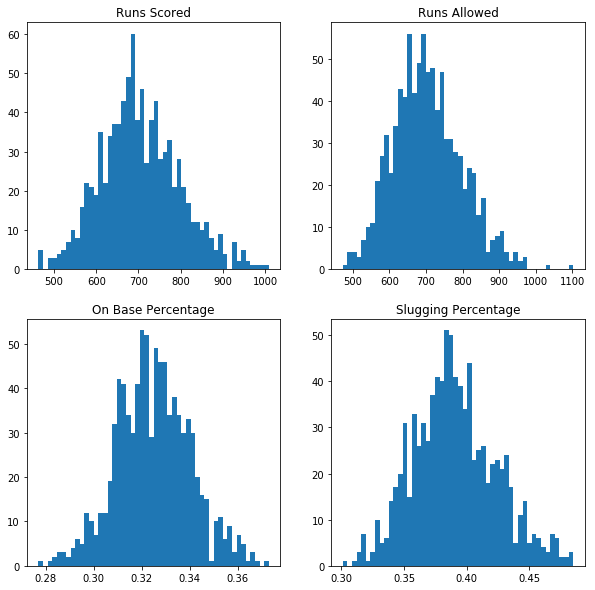

In [16]:
f,ax = plt.subplots(2,2)
ax[0,0].hist(moneyball.RS,bins=50)
ax[0,0].set_title("Runs Scored")
ax[0,1].hist(moneyball.RA,bins=50)
ax[0,1].set_title("Runs Allowed")
ax[1,0].hist(moneyball.OBP,bins=50)
ax[1,0].set_title("On Base Percentage")
ax[1,1].hist(moneyball.SLG,bins=50)
ax[1,1].set_title("Slugging Percentage")
f.subplots_adjust(hspace=0.2)
f.set_figheight(10)
f.set_figwidth(10)

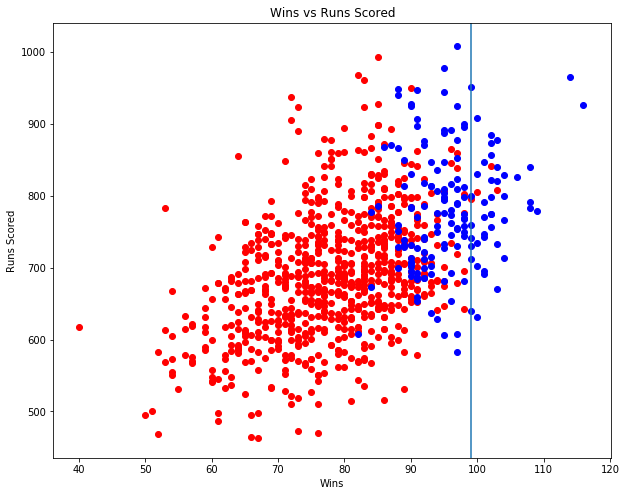

In [17]:
moneyball1=moneyball.loc[moneyball['Playoffs']==1]
moneyball0=moneyball.loc[moneyball['Playoffs']==0]
plt.figure(figsize=(10,8))
plt.scatter(x=moneyball0.W,y = moneyball0.RS,c='red')
plt.scatter(x=moneyball1.W,y = moneyball1.RS,c='blue')
plt.title("Wins vs Runs Scored")
plt.xlabel("Wins")
plt.ylabel("Runs Scored")
plt.axvline(x=99)

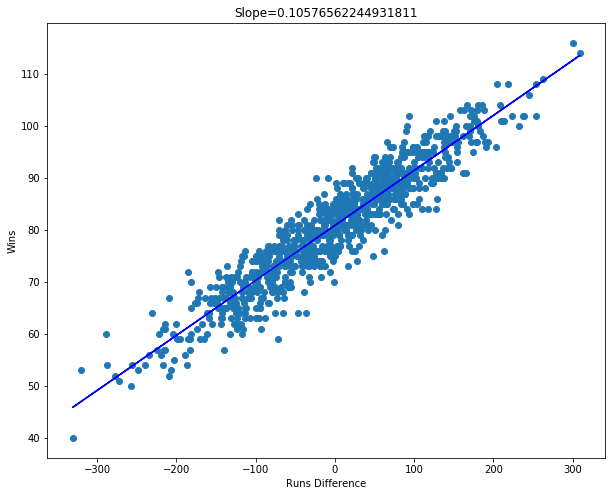

In [18]:
x=np.array(moneyball.RD)
y=np.array(moneyball.W)
slope, intercept=np.polyfit(x,y,1)
abline_values=[slope*i+intercept for i in x]
plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.plot(x, abline_values,'b')
plt.title("Slope=%s"%(slope))
plt.xlabel("Runs Difference")
plt.ylabel("Wins")
plt.show()

In [20]:
#we can see that the relationship between the two variables is linear
print(np.corrcoef(x,y))

[[1.         0.93851498]
 [0.93851498 1.        ]]


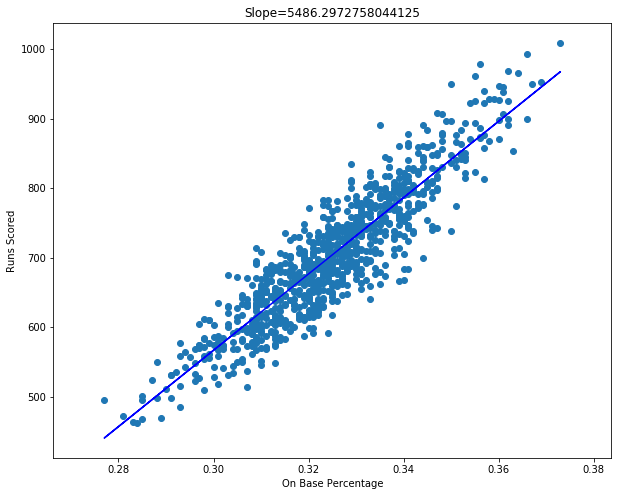

In [21]:
x=np.array(moneyball.OBP)
y=np.array(moneyball.RS)
slope, intercept=np.polyfit(x,y,1)
abline_values=[slope*i+intercept for i in x]
plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.plot(x, abline_values,'b')
plt.title("Slope=%s"%(slope))
plt.xlabel("On Base Percentage")
plt.ylabel("Runs Scored")
plt.show()

In [22]:
print(np.corrcoef(moneyball.OBP,moneyball.RS))

[[1.         0.90490915]
 [0.90490915 1.        ]]


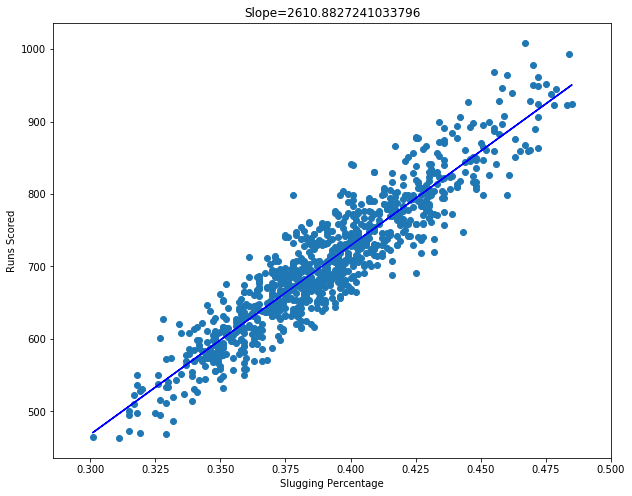

In [23]:
x=np.array(moneyball.SLG)
y=np.array(moneyball.RS)
slope, intercept=np.polyfit(x,y,1)
abline_values=[slope*i+intercept for i in x]
plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.plot(x, abline_values,'b')
plt.title("Slope=%s"%(slope))
plt.xlabel("Slugging Percentage")
plt.ylabel("Runs Scored")
plt.show()

In [24]:
print(np.corrcoef(moneyball.SLG,moneyball.RS))

[[1.         0.92638433]
 [0.92638433 1.        ]]


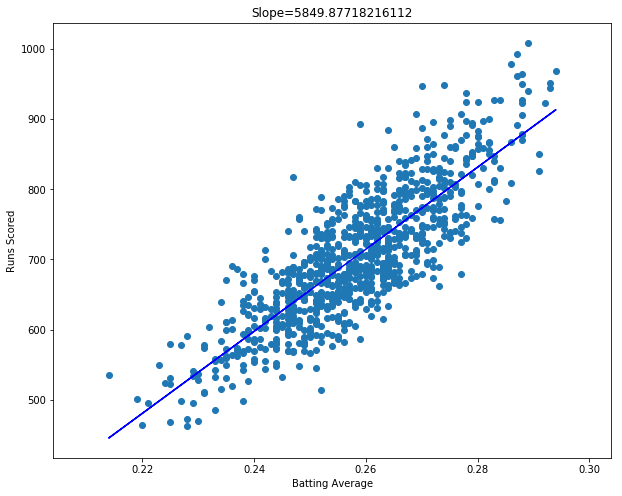

In [26]:
x=np.array(moneyball.BA)
y=np.array(moneyball.RS)
slope, intercept=np.polyfit(x,y,1)
abline_values=[slope*i+intercept for i in x]
plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.plot(x, abline_values,'b')
plt.title("Slope=%s"%(slope))
plt.xlabel("Batting Average")
plt.ylabel("Runs Scored")
plt.show()

In [27]:
print(np.corrcoef(moneyball.BA,moneyball.RS))

[[1.         0.83162475]
 [0.83162475 1.        ]]


In [38]:
moneyball.isnull()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,G,OOBP,OSLG,RD
330,False,False,False,False,False,False,False,False,False,False,False,False,False,False
331,False,False,False,False,False,False,False,False,False,False,False,False,False,False
332,False,False,False,False,False,False,False,False,False,False,False,False,False,False
333,False,False,False,False,False,False,False,False,False,False,False,False,False,False
334,False,False,False,False,False,False,False,False,False,False,False,False,False,False
335,False,False,False,False,False,False,False,False,False,False,False,False,False,False
336,False,False,False,False,False,False,False,False,False,False,False,False,False,False
337,False,False,False,False,False,False,False,False,False,False,False,False,False,False
338,False,False,False,False,False,False,False,False,False,False,False,False,False,False
339,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [39]:
moneyball.isnull().sum()
moneyball.drop(['RankSeason','RankPlayoffs'],axis=1,inplace=True)

KeyError: "['RankSeason' 'RankPlayoffs'] not found in axis"

In [40]:
moneyballnew=moneyball.dropna()
moneyballnew.head()

,Team,League,Year,RS,RA,W,OBP,SLG,BA,Playoffs,G,OOBP,OSLG,RD
330,ANA,AL,2001,691,730,75,0.327,0.405,0.261,0,162,0.331,0.412,-39
331,ARI,NL,2001,818,677,92,0.341,0.442,0.267,1,162,0.311,0.404,141
332,ATL,NL,2001,729,643,88,0.324,0.412,0.260,1,162,0.314,0.384,86
333,BAL,AL,2001,687,829,63,0.319,0.380,0.248,0,162,0.337,0.439,-142
334,BOS,AL,2001,772,745,82,0.334,0.439,0.266,0,161,0.329,0.393,27


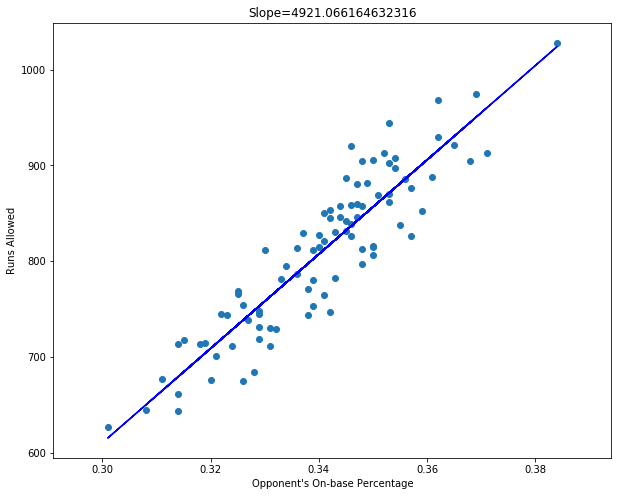

In [41]:
x=np.array(moneyballnew.OOBP)
y=np.array(moneyballnew.RA)
slope, intercept=np.polyfit(x,y,1)
abline_values=[slope*i+intercept for i in x]
plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.plot(x, abline_values,'b')
plt.title("Slope=%s"%(slope))
plt.xlabel("Opponent's On-base Percentage")
plt.ylabel("Runs Allowed")
plt.show()

In [42]:
print(np.corrcoef(moneyballnew.OOBP,moneyballnew.RA))

[[1.         0.90990783]
 [0.90990783 1.        ]]


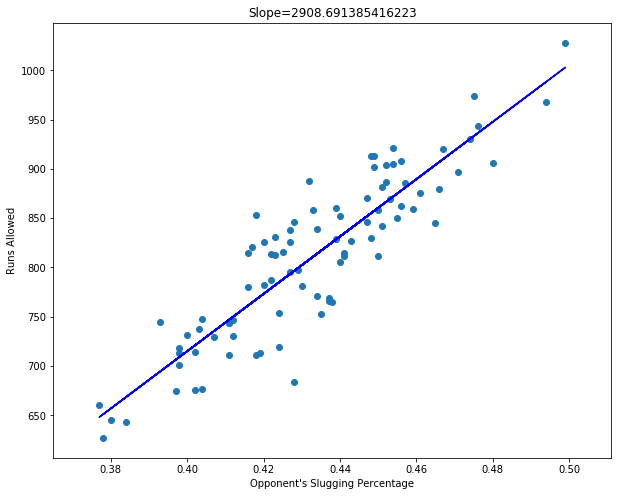

In [43]:
x=np.array(moneyballnew.OSLG)
y=np.array(moneyballnew.RA)
slope, intercept=np.polyfit(x,y,1)
abline_values=[slope*i+intercept for i in x]
plt.figure(figsize=(10,8))
plt.scatter(x,y)
plt.plot(x, abline_values,'b')
plt.title("Slope=%s"%(slope))
plt.xlabel("Opponent's Slugging Percentage")
plt.ylabel("Runs Allowed")
plt.show()

In [45]:
print(np.corrcoef(moneyballnew.OSLG,moneyballnew.RA))

[[1.         0.89511011]
 [0.89511011 1.        ]]


# Model Building

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
from sklearn.cross_validation import train_test_split

D:\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [49]:
x=moneyball[['OBP','SLG','BA']].values
y=moneyball[['RS']].values
model=LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
print(model.intercept_)
print(model.coef_)

[-788.45704708]
[[2917.42140821 1637.92766577 -368.96606009]]


In [61]:
x=moneyball[['OBP','SLG']].values
y=moneyball[['RS']].values
RS_model=LinearRegression()
RS_model.fit(x,y)
print(model.intercept_)
print(model.coef_)
RS_model.predict([[0.343,.422]])

[-788.45704708]
[[2917.42140821 1637.92766577 -368.96606009]]


array([[803.25880208]])